# Loading Libraries

In [43]:
import pandas as pd
import numpy as np
from nsepy import get_history
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import time
import matplotlib.pyplot as plt
from textblob import TextBlob

# Fetching Numerical Data

In [48]:
# Defining the Time period 

start_date = datetime(2010,8,8)
end_date = datetime(2016,7,1)

# Fetching the Data

Stock_df = get_history(symbol='AXISBANK', start = start_date, end =end_date)

## Basic Exploration

In [49]:
print('The Shape of the Dataframe is: ',Stock_df.shape)

The Shape of the Dataframe is:  (1469, 14)


In [50]:
Stock_df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2010-08-09,AXISBANK,EQ,1314.3,1314.3,1321.80,1294.00,1310.3,1309.8,1306.78,1572650,2.055112e+14,NaN,908682,0.5778
2010-08-10,AXISBANK,EQ,1309.8,1310.0,1315.00,1288.50,1291.7,1294.9,1302.82,1348168,1.756414e+14,NaN,731702,0.5427
2010-08-11,AXISBANK,EQ,1294.9,1294.9,1301.50,1276.65,1291.6,1289.1,1286.80,1324664,1.704573e+14,NaN,706726,0.5335
2010-08-12,AXISBANK,EQ,1289.1,1280.0,1319.85,1274.85,1318.0,1315.6,1303.50,1195305,1.558077e+14,NaN,398046,0.3330
2010-08-13,AXISBANK,EQ,1315.6,1320.0,1336.00,1320.00,1332.2,1328.2,1329.16,906967,1.205503e+14,NaN,451527,0.4978


In [116]:
# Creating a Column as Date

Stock_df['Trade_Date'] = Stock_df.index
Stock_df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Trade_Date
Date,,,,,,,,,,,,,,,
2010-08-09,AXISBANK,EQ,1314.3,1314.3,1321.80,1294.00,1310.3,1309.8,1306.78,1572650,2.055112e+14,NaN,908682,0.5778,2010-08-09
2010-08-10,AXISBANK,EQ,1309.8,1310.0,1315.00,1288.50,1291.7,1294.9,1302.82,1348168,1.756414e+14,NaN,731702,0.5427,2010-08-10
2010-08-11,AXISBANK,EQ,1294.9,1294.9,1301.50,1276.65,1291.6,1289.1,1286.80,1324664,1.704573e+14,NaN,706726,0.5335,2010-08-11
2010-08-12,AXISBANK,EQ,1289.1,1280.0,1319.85,1274.85,1318.0,1315.6,1303.50,1195305,1.558077e+14,NaN,398046,0.3330,2010-08-12
2010-08-13,AXISBANK,EQ,1315.6,1320.0,1336.00,1320.00,1332.2,1328.2,1329.16,906967,1.205503e+14,NaN,451527,0.4978,2010-08-13


In [118]:
# Changing the Data Type of the 'Trade Date' variable

Stock_df['Trade_Date'] = pd.to_datetime(Stock_df['Trade_Date'],
                                           format = '%Y-%m-%d')

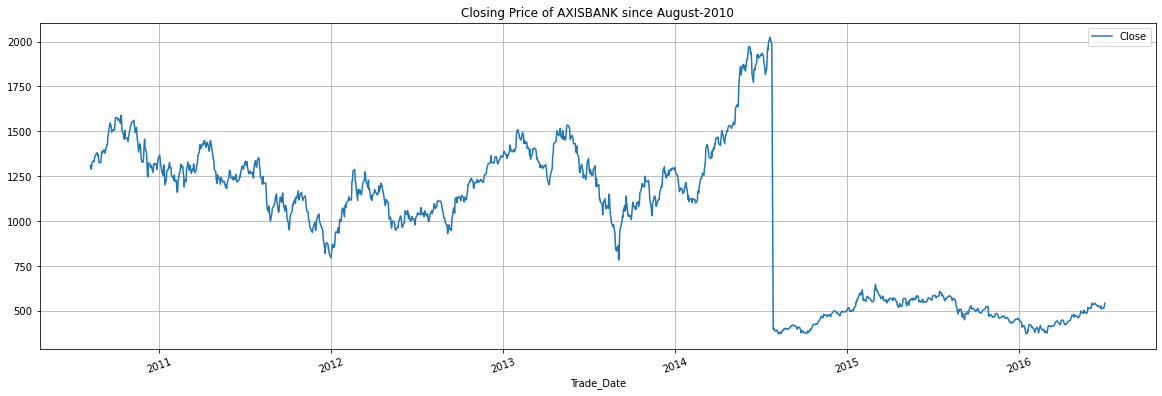

In [53]:
# Trend of Closing Prices of the Stocks

%matplotlib inline
Stock_df.plot(x = 'Trade_Date', y = ['Close'], kind = 'line', figsize = (20,6), rot=20, grid = 1,
             title = 'Closing Price of AXISBANK since August-2010')

## Preparing the Data

In [55]:
FullData = Stock_df[['Close']].values

# Feature Scaling for Faster Training

mx = MinMaxScaler()

DataScaler = mx.fit(FullData)
X = DataScaler.transform(FullData)

# Confirming the Scaling

X[0:5]

array([[0.5681605 ],
       [0.55914304],
       [0.55563289],
       [0.57167065],
       [0.57929615]])

## Splitting the Samples

In [56]:
X_samples = list()
y_samples = list()

NumberOfRows = len(X)
TimeSteps = 10  # Next Day's Price Prediction is based om last N number of past day's prices

for i in range(TimeSteps, NumberOfRows, 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

In [57]:
# Reshaping of the Input as a 3D

X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1) # (Samples, Time Steps, Features)
print(X_data.shape)

y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
print(y_data.shape)

(1459, 10, 1)
(1459, 1)


In [58]:
# Choosing the number of testing data records
TestingRecords=10

# Splitting the data into train and test

X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

# Printing the shape of training and testing

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1449, 10, 1)
(1449, 1)
(10, 10, 1)
(10, 1)


## Fitting the LSTM Model

In [59]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

regressor = Sequential()

regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Number of TimeSteps: 10
Number of Features: 1


In [29]:
# Measuring the time taken by the model to train

StartTime = time.time()

# Fitting RNN to the Training set

regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/100
290/290 [==============================] - 2s 6ms/step - loss: 0.0418
Epoch 2/100
290/290 [==============================] - 2s 6ms/step - loss: 0.0029
Epoch 3/100
290/290 [==============================] - 2s 6ms/step - loss: 0.0024
Epoch 4/100
290/290 [==============================] - 2s 6ms/step - loss: 0.0021
Epoch 5/100
290/290 [==============================] - 3s 9ms/step - loss: 0.0019
Epoch 6/100
290/290 [==============================] - 3s 9ms/step - loss: 0.0018
Epoch 7/100
290/290 [==============================] - 3s 10ms/step - loss: 0.0017
Epoch 8/100
290/290 [==============================] - 7s 24ms/step - loss: 0.0016: 0s - lo
Epoch 9/100
290/290 [==============================] - 7s 24ms/step - loss: 0.0017
Epoch 10/100
290/290 [==============================] - 6s 20ms/step - loss: 0.0016
Epoch 11/100
290/290 [==============================] - 3s 12ms/step - loss: 0.0020
Epoch 12/100
290/290 [==============================] - 2s 6ms/step - loss: 0.0014

# Generating Predictions

In [31]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)

# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)

# Accuracy of the predictions
print('Accuracy of the Model is: ',np.round(100 - (100*(abs(orig-predicted_Price)/orig)).mean(),2))

Accuracy of the Model is:  97.43


Accuracy of the base model is : 97.43

## Plotting Predictions for Full Data

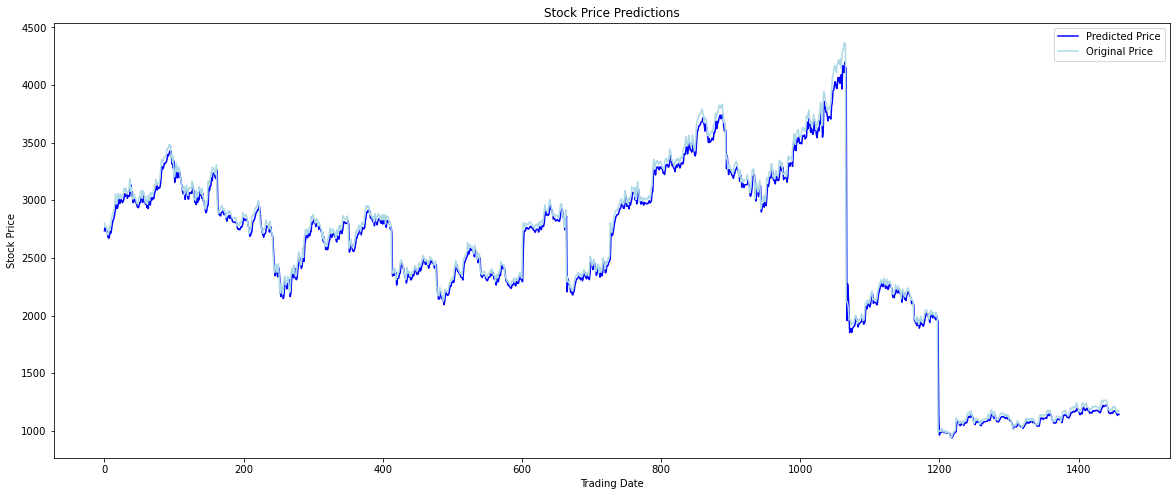

In [34]:
TrainPredictions=DataScaler.inverse_transform(regressor.predict(X_train))
TestPredictions=DataScaler.inverse_transform(regressor.predict(X_test))

FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=FullData[TimeSteps:]

# plotting the full data
plt.plot(FullDataPredictions, color = 'blue', label = 'Predicted Price')
plt.plot(FullDataOrig , color = 'lightblue', label = 'Original Price')


plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()

# Fetching Textual Data

In [6]:
# Encoding Determination of the csv file

with open('stocknews_Combined_News_DJIA.csv') as headlines:
    print(headlines)

<_io.TextIOWrapper name='stocknews_Combined_News_DJIA.csv' mode='r' encoding='cp1252'>


In [65]:
# Loading the News Headlines from the downloaded File

stock_head = pd.read_csv('india-news-headlines.csv', encoding = 'cp1252',
                        index_col = False)

# Shape of the Dataframe

print('The shape of the Textual Dataframe is :', stock_head.shape)

The shape of the Textual Dataframe is : (3424067, 3)


# Basic Exploration

In [66]:
stock_head.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [27]:
stock_head['headline_category'].nunique()

1013

In [39]:
stock_head['headline_category'].value_counts().head(10)

india                            288541
unknown                          209582
city.mumbai                      134428
city.delhi                       127717
business.india-business          116761
city.chandigarh                  110453
city.hyderabad                   104692
city.bengaluru                    93663
entertainment.hindi.bollywood     91376
city.ahmedabad                    89513
Name: headline_category, dtype: int64

In [34]:
stock_head.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


# Pre-processing

In [77]:
# Changing the data type of the 'publish_date' column

stock_head['publish_date'] = pd.to_datetime(stock_head['publish_date'],
                                           format = '%Y%m%d')

In [78]:
# Confirming the Changes
stock_head['publish_date'].head()

0   2001-01-02
1   2001-01-02
2   2001-01-02
3   2001-01-02
4   2001-01-02
Name: publish_date, dtype: datetime64[ns]

In [79]:
# Creating a sub-set with relevant 'headline_category'

stock_head_sub=stock_head[stock_head['headline_category']=='business.india-business']
stock_head_sub.shape

(116761, 3)

In [82]:
# Creating another sub-set with date constrain

stock_head_sub = stock_head_sub[(stock_head_sub['publish_date']>'2010-08-08') & (stock_head_sub['publish_date']<'2016-07-02')]
stock_head_sub.shape

(41190, 3)

In [84]:
stock_head_sub.head()

,publish_date,headline_category,headline_text
959012,2010-08-09,business.india-business,Is Walmart retailing in India?
959023,2010-08-09,business.india-business,'Don't bank only on price-to-earning ratio'
959037,2010-08-09,business.india-business,GM may source Tavera engines from Sonalika
959039,2010-08-09,business.india-business,Ruia group will bid for SsangYong
959043,2010-08-09,business.india-business,Parsis' emotional connect with Tatas


In [85]:
stock_head_sub.tail()

,publish_date,headline_category,headline_text
2422189,2016-07-01,business.india-business,India came out of Brexit relatively well: Worl...
2422251,2016-07-01,business.india-business,Rupee gains 9 paise against dollar
2422263,2016-07-01,business.india-business,Sensex rises over 200 points on foreign inflows
2422289,2016-07-01,business.india-business,Silver futures tops 45k per kg level; tracking...
2422363,2016-07-01,business.india-business,NPA situation well under control: Jaitley


In [97]:
text_polarity = []
text_subjectivity = []

for i in range(len(stock_head_sub)):
    pol = TextBlob(stock_head_sub['headline_text'].iloc[i]).sentiment[0]
    sub = TextBlob(stock_head_sub['headline_text'].iloc[i]).sentiment[1]
    
    text_polarity.append(pol)
    text_subjectivity.append(sub)
    
# Making New Columns using the formed lists

stock_head_sub['Text_Polarity'] = text_polarity
stock_head_sub['Text_Subjectivity'] = text_subjectivity

In [98]:
# Confirming the Changes

stock_head_sub.head()

,publish_date,headline_category,headline_text,Text_Polarity,Text_Subjectivity
959012,2010-08-09,business.india-business,Is Walmart retailing in India?,0.0,0.00
959023,2010-08-09,business.india-business,'Don't bank only on price-to-earning ratio',0.0,1.00
959037,2010-08-09,business.india-business,GM may source Tavera engines from Sonalika,0.0,0.00
959039,2010-08-09,business.india-business,Ruia group will bid for SsangYong,0.0,0.00
959043,2010-08-09,business.india-business,Parsis' emotional connect with Tatas,0.0,0.65


Due to the fact that there are multiple entries of headlines for a single date, to be able to be interpreted by ML model, same day entries are grouped and the sentiment scores are aggregated by the mean score.

In [108]:
stock_head_grouped = stock_head_sub.groupby('publish_date').agg({'Text_Polarity': 'mean',
                                                                'Text_Subjectivity': 'mean'})

# Confirming the Changes

stock_head_grouped.head()

,Text_Polarity,Text_Subjectivity
publish_date,,
2010-08-09,0.013636,0.142330
2010-08-10,0.027778,0.054040
2010-08-11,-0.024958,0.080766
2010-08-12,-0.001840,0.136001
2010-08-13,0.047064,0.142992


In [109]:
stock_head_grouped.reset_index(inplace=True)
stock_head_grouped.head() # Final Dataframe for Textual Analysis

,publish_date,Text_Polarity,Text_Subjectivity
0,2010-08-09,0.013636,0.142330
1,2010-08-10,0.027778,0.054040
2,2010-08-11,-0.024958,0.080766
3,2010-08-12,-0.001840,0.136001
4,2010-08-13,0.047064,0.142992


Moving forward, the two dataframes are to be merged with the dataframe from the Numerical Analysis part.

In [111]:
stock_head_grouped.tail()

,publish_date,Text_Polarity,Text_Subjectivity
2147,2016-06-27,0.046013,0.244917
2148,2016-06-28,0.025977,0.298016
2149,2016-06-29,0.014205,0.071591
2150,2016-06-30,0.073636,0.105455
2151,2016-07-01,0.027534,0.098494


The two dataframes are merged using inner-join. As there seems to difference in lengths of the dataframes, we need to check the dates not common in both the dataframes.

In [119]:
# New DataFrame creation for 'HYBRID MODEL'

merged_df = pd.merge(left = Stock_df, right = stock_head_grouped,
                     left_on = 'Trade_Date', right_on = 'publish_date')

print('The shape of the Merged DataFrame is: ',merged_df.shape)

The shape of the Merged DataFrame is:  (1469, 18)


# Preparing the Data

In [121]:
Hybrid_data = merged_df[['Text_Polarity', 'Text_Subjectivity', 'Close']].values

# Feature Scaling

mx = MinMaxScaler()

DataScaler = mx.fit(Hybrid_data)
X = DataScaler.transform(Hybrid_data)

# Splitting the Sample

In [141]:
X_samples = list()
y_samples = list()

NumberOfRows = len(X)
TimeSteps = 10  # Next Day's Price Prediction is based om last N number of past day's prices

for i in range(TimeSteps, NumberOfRows, 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)
    
# Reshaping of the Input as a 3D

X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 3) # (Samples, Time Steps, Features)
print(X_data.shape)

y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 3)
print(y_data.shape)

# Choosing the number of testing data records
TestingRecords=10

# Splitting the data into train and test

X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

# Printing the shape of training and testing

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1459, 10, 3)
(1459, 3)
(1449, 10, 3)
(1449, 3)
(10, 10, 3)
(10, 3)


# Fitting the LSTM Model

In [146]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

regressor = Sequential()

regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))

regressor.add(Dense(units = 3))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Measuring the time taken by the model to train

StartTime = time.time()

# Fitting RNN to the Training set

regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Number of TimeSteps: 10
Number of Features: 3
Epoch 1/100
290/290 [==============================] - 2s 6ms/step - loss: 0.0440
Epoch 2/100
290/290 [==============================] - 2s 6ms/step - loss: 0.0123
Epoch 3/100
290/290 [==============================] - 2s 6ms/step - loss: 0.0120
Epoch 4/100
290/290 [==============================] - 2s 8ms/step - loss: 0.0117
Epoch 5/100
290/290 [==============================] - 2s 6ms/step - loss: 0.0116
Epoch 6/100
290/290 [==============================] - 2s 6ms/step - loss: 0.0115
Epoch 7/100
290/290 [==============================] - 2s 6ms/step - loss: 0.0114
Epoch 8/100
290/290 [==============================] - 2s 6ms/step - loss: 0.0114
Epoch 9/100
290/290 [==============================] - 2s 6ms/step - loss: 0.0114
Epoch 10/100
290/290 [==============================] - 2s 6ms/step - loss: 0.0112
Epoch 11/100
290/290 [==============================] - 2s 6ms/step - loss: 0.0112
Epoch 12/100
290/290 [============================

290/290 [==============================] - 2s 6ms/step - loss: 0.0103
Epoch 100/100
290/290 [==============================] - 2s 6ms/step - loss: 0.0104
############### Total Time Taken:  3 Minutes #############


# Generating Predictions

In [166]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)

# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)

# Accuracy of the predictions
print('Accuracy of the Hybrid Model is: ',np.round(100 - (100*(abs(orig[:,2]-predicted_Price[:,2])/orig[:,2])).mean(),2))

Accuracy of the Hybrid Model is:  98.06


# Conclusion

- The Accuracy of the Base Model: **97.43%**
- The Accuracy of the Hybrid Model: **98.06%**
- Accuracy Improvement: **0.63%**